In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Visualization with Matplotlib
    Simple Line Plots
    Simple Scatter Plots
    Visualizing Errors

## A Brief Introduction

In [2]:
#use plt.style to set an appropriate aesthetic

plt.style.use('fivethirtyeight') #book uses classic

The three applicable contexts are using Matplotlib in a script, in an IPython terminal, or in an IPython notebook.

+ **Script**
    + Use **plt.show()**, otherwise your plot won't show! plt.show() starts an event loop and looks for all currently active figure objects and opens one or more interactive windows to display you figure(s).
        + *Note:* The plt.show() command should be used **only once** per Python session, and is most often seen at the very end of the script. Multiple show() commands can lead to unpredictable backend-dependent behavior, and should mostly be avoided.


+ **IPython Terminal**
    + Use the **%matplotlib** magic command after starting ipython. Now any plt plot command will cause a figure window to open and further commands will update the plot. Some update will not show, such a changing already drawn lines, to force an update call **plt.draw()**
    
    
+ **Jupyter Notebook (here we are!)**
    + There are two magic command to embed the graphic into the notebook;
        + **%matplotlib notebook** - this leads to *interactive* plots within the notebook
        + **%matplotlive inline** - this leads to *static* images of your plot within the notebook.

In [7]:
%matplotlib inline 
#now we can create png images of our graphs!

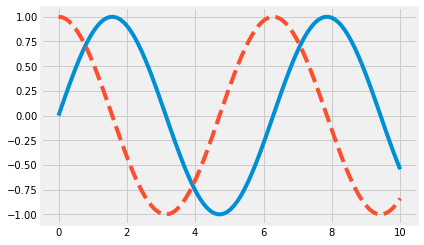

In [8]:
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

We also have the option to save our figures in a wide variety of formats. THis can be done using the **savefig()** command. Let's save that graph above;

In [9]:
fig.savefig('first_figure.png')

In [12]:
!ls 
#there is it!

data				      first_figure.png
data_manipulation_pandas_10-12.ipynb  Visualization with Matplotlib.ipynb


We can use the IPython Image object to display the content of this file in our notebook. Let's double check that matplotlib saved the right graph;

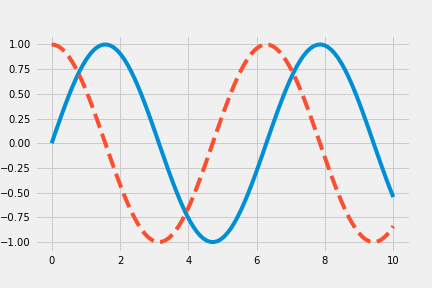

In [14]:
from IPython.display import Image
Image('first_figure.png') #oh look, it did!

In [15]:
fig.canvas.get_supported_filetypes() #supported filetypes

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

*Note:* if you're just saving all of your plots, you don't need plt.show() or any of the magic commands mentioned. I'm note sure how often this would be the case though.

There's a section here about the MATLAB like interface for matplotlib and the object oriented one. I was not a fan of MATLAB in college, so I'm going to skip it and just look at the OO interface;

Here we hve control over the figure, instead of letting matplotlib keep track of the active figure, we use *methods* on explicit **Figure** and **Axis** objects.

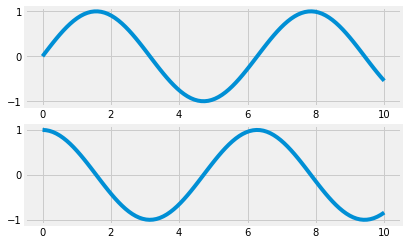

In [16]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

## Simple Line Plots

We are going to graph some sort of $y=f(x)$. Let's start by creating a blank figure and an axes.

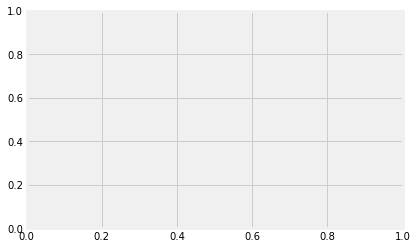

In [18]:
fig = plt.figure()
ax = plt.axes()

The **figure** (an instance of the class plt.Figure) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. 

The **axes** (an instance of the class plt.Axes) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization. 

Once we have a figure and axes, we can use ax.plot() to plot some data.

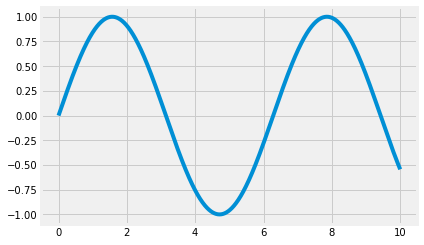

In [19]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

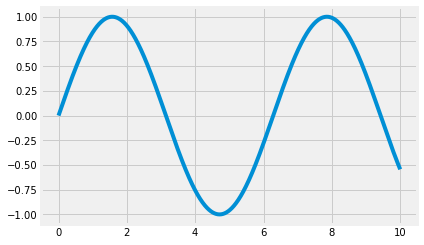

In [21]:
#simple pylab style of the graph above
plt.plot(x, np.sin(x));

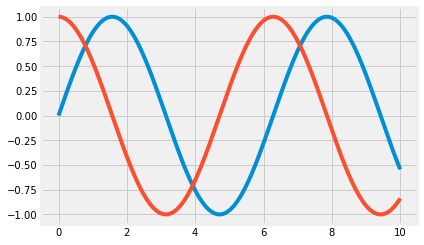

In [22]:
#want to plot two lines on the same graph?
#just call that pylab style call twice
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

Let's start playing around with colors!

The plt.plot() function takes additional arguments that can be used to specify the plot's style. 

To adjust the color, you can use the **color keyword**, which accepts a string argument representing virtually any imaginable color. 

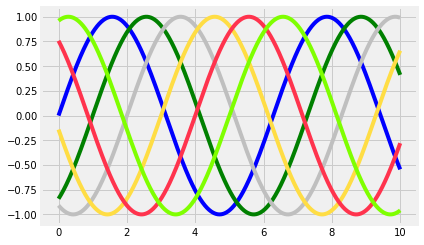

In [23]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

Similarly, the line style can be adjusted using the **linestyle keyword**;

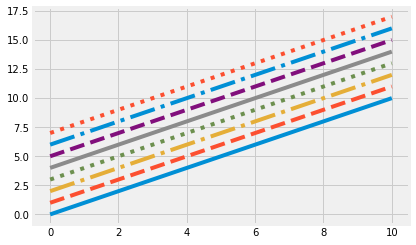

In [25]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# We don't have time for words though! Use some codes!
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

#oh note how we didn't specify the color, matplotlib automatically cycled through some.

Really short on time? Combine the linestyle and color codes into a single non-keyword argument and pass it plt.plot!

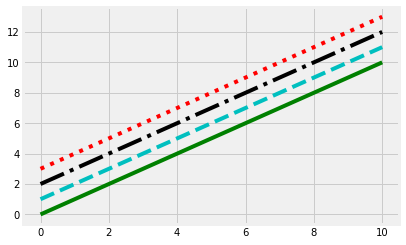

In [26]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

Let's start adjusting the plot, while matplotlib does a decent job of choosing default axes limits for your plot, sometimes you just want MORE CONTROL!

The most basic way to adjust axis limits is to use the plt.xlim() and plt.ylim() methods, they take a max and min value for each axis.

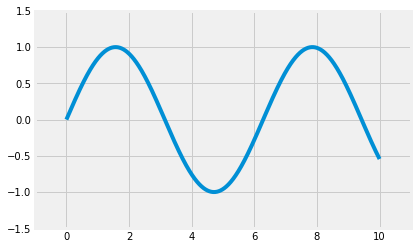

In [27]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

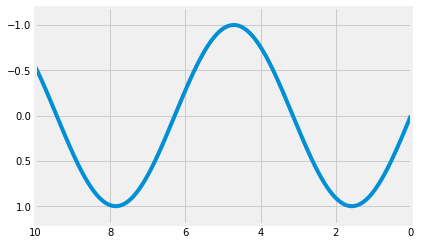

In [28]:
#simply reverse the order of the argument if you want a reversed graph, ya weirdo!
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

 useful related method is **plt.axis()** *(note here the potential confusion between axes with an e, and axis with an i)*. 
 
 The plt.axis() method allows you to set the x and y limits with a single call, by passing a list which specifies [xmin, xmax, ymin, ymax]:

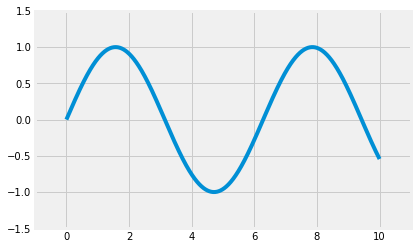

In [30]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]); #[xmin, xmax, ymin, ymax]

Let's go beyond that and use plt.axis to push the limits. How about we tell it to automatically tighten the bound around the current plot?

(-0.5, 10.5, -1.0999971452300779, 1.0999995492467289)

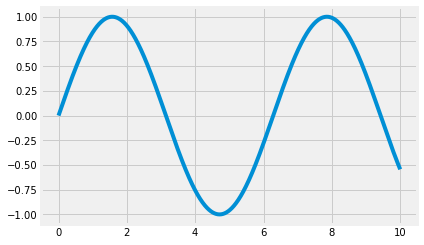

In [31]:
plt.plot(x, np.sin(x))
plt.axis('tight')

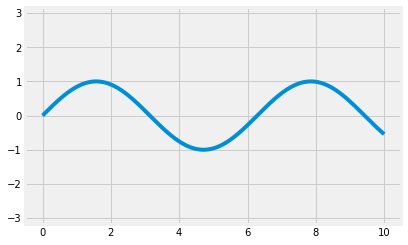

In [33]:
#how about an equal aspect ratio, aka one unit in x is equal to one in y?
plt.plot(x, np.sin(x))
plt.axis('equal'); #of course it does that!

Finally, let's start **labeling** our plots so we know what's going on.

The simplest labels are plot titles and axis labels.

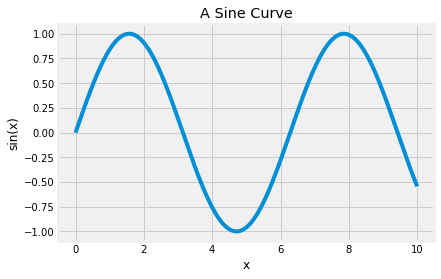

In [34]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

The position, size, and style of these labels can be adjusted using optional arguments to the function. 

When we plot more than one line on a plot, we probably want a legend to tell us what's what. The **plt.legend()** method will do that for us. 

There are a few way to do this, but the easiest is to just specify the label of each line using the label keyword of the plot function.

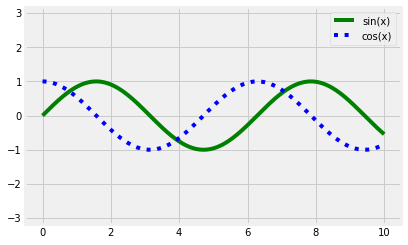

In [35]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

Here we've been using the MATLAB style interface, most commands are the same for the object oriented  interface, but a few change. So, while plt.plot() → ax.plot() and plt.legend() → ax.legend() are the same, the following command are different;

+ plt.xlabel() → ax.set_xlabel()
+ plt.ylabel() → ax.set_ylabel()
+ plt.xlim() → ax.set_xlim()
+ plt.ylim() → ax.set_ylim()
+ plt.title() → ax.set_title()

When using the OO interfect, it is easier to use **ax.set()**. This avoid calling each of those method individually.

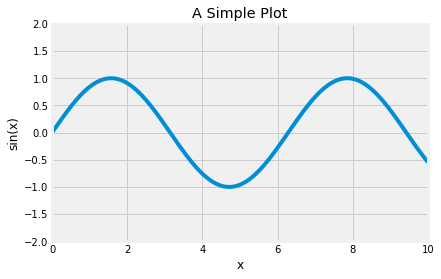

In [37]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2), #set out axis limits
       xlabel='x', ylabel='sin(x)', #set our axis labels
       title='A Simple Plot'); #set our title

## Simple Scatter Plots

We can still use plt.plot or ax.plot when plotting scatter plots!

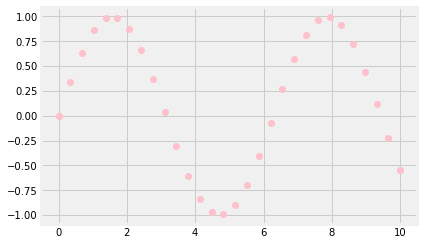

In [41]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='pink');

The third argument in the function call is a character that represents the **type of symbol used for the plotting**. 

Just as you can specify options such as '-', '--' to control the line style, the marker style has its own set of short string codes. 

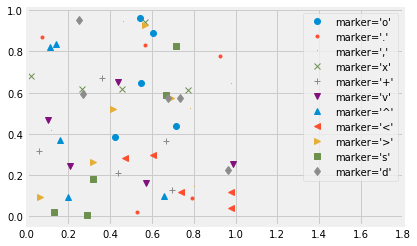

In [42]:
#look at all these markers!
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

For even more possibilities, these character codes can be used together with line and color codes to plot points along with a line connecting them:

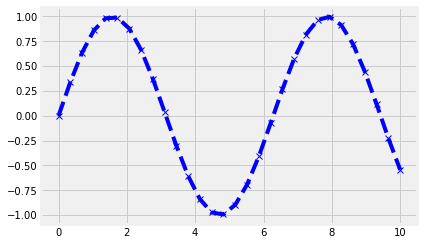

In [47]:
plt.plot(x, y, '--xb'); #dashed line, x marker, blue in color

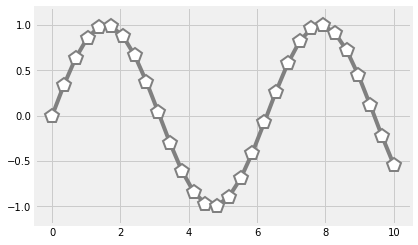

In [49]:
#we can get real wild with the different plot arguments
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

A second, more powerful method of creating scatter plots is the **plt.scatter** function, which can be used very similarly to the plt.plot function:

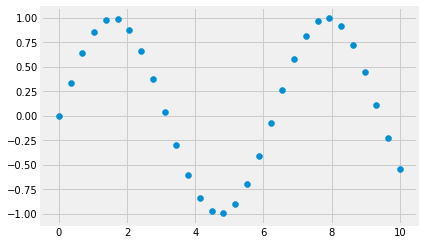

In [51]:
plt.scatter(x, y, marker='o');

The primary difference of plt.scatter from plt.plot is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

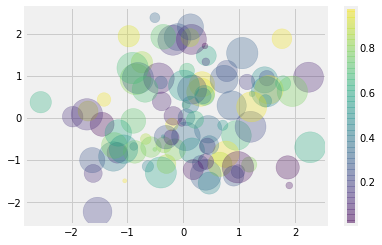

In [52]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, #sets the color, size of the point and adjusts the transperncy
            cmap='viridis') #maps the color to the data
plt.colorbar();  # show color scale

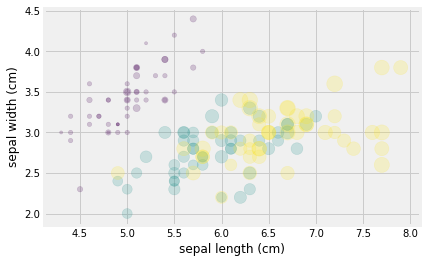

In [53]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

**Efficiency Note**

Aside from the different features available in plt.plot and plt.scatter, why might you choose to use one over the other? 

While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, plt.plot can be noticeably more efficient than plt.scatter. The reason is that plt.scatter has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually. In plt.plot, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data. 

**For large datasets, the difference between these two can lead to vastly different performance, and for this reason, plt.plot should be preferred over plt.scatter for large datasets.**

## Visualizing Errors

Let's visualize some basic error bars, this gives the uncertainty or error of the corresponding coordinate of the point.

In [63]:
#going to switch up the style, default 538 to thick for this
plt.style.use('seaborn-whitegrid')

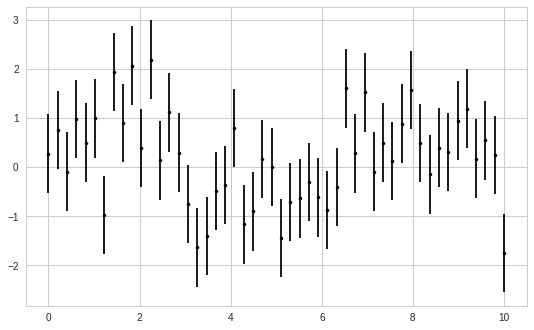

In [64]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k'); #fmt is format code, works with shorthand syntax from plt.plot

In addition to these basic options, the errorbar function has many options to fine-tune the outputs. Using these additional options you can easily customize the aesthetics of your errorbar plot.

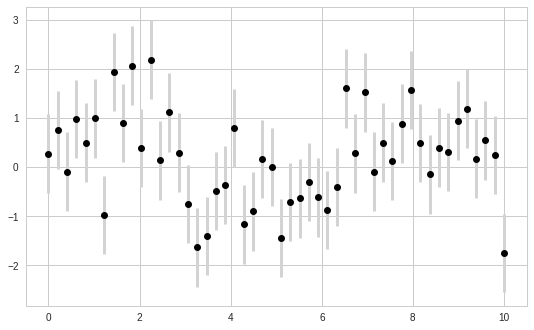

In [65]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

Sometimes we want to show errorbars on continous quantites. This is not built in to Matplotlib, but we can combine **plt.plot** and **plt.fill_between**

Here we perform a *Gaussian process regression*. This is a method of fitting a very flexible non-parametric function to data with a continuous measure of the uncertainty.

In [72]:
from sklearn.gaussian_process import GaussianProcessRegressor

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcessRegressor() #GuassianProcess was depreciated
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], return_std=True) #new predict does not accept MSE parameter
dyfit = 2 * np.sqrt(MSE)  # 2*sigma ~ 95% confidence region

We now have xfit, yfit, and dyfit, which sample the continuous fit to our data. We could pass these to the plt.errorbar function as above, but we don't really want to plot 1,000 points with 1,000 errorbars. Instead, we can use the plt.fill_between function with a light color to visualize this continuous error:

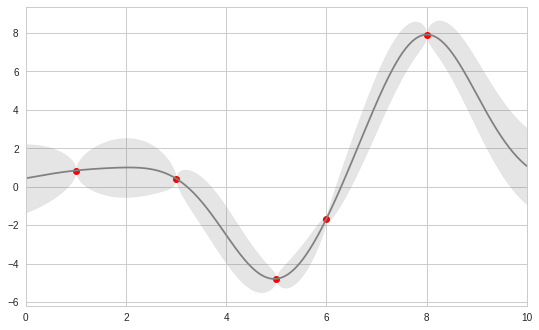

In [73]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

Note what we've done here with the fill_between function: we pass an x value, then the lower y-bound, then the upper y-bound, and the result is that the area between these regions is filled.